# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

%run ../../common_settings.py

# Load data

In [2]:
fsk_ad = sc.read('h5ad/fetal_skin.norm.20200829.h5ad')

Only considering the two last: ['.20200829', '.h5ad'].
Only considering the two last: ['.20200829', '.h5ad'].


In [3]:
fsk_ad

AnnData object with n_obs × n_vars = 187293 × 28885
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype', 'annotation', 'annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'cc', 'n_counts'

In [4]:
fsk_celltype_df = pd.read_csv('fetal_skin.independent_annot_celltypes.20200829.tsv', sep='\t')

In [5]:
fsk_celltype_df.head(2)

,Refined,Broad_1,Broad_2,Broad_3,Broad_4,Broad_5
0,ASDC,ASDC,cDC,DC,Antigen Presenting Cells,Immune
1,Activated mac,Macrophage,Macrophage,Macrophage,Antigen Presenting Cells,Immune


In [6]:
fsk_obs_df = pd.read_csv('fetal_skin.annotation_with_UMAP.20200829.tsv.gz', sep='\t', index_col=0)

In [7]:
fsk_obs_df[['annot1', 'annot2', 'Refined', 'UMAP1a', 'UMAP2a', 'UMAP1b', 'UMAP2b']].head(2)

,annot1,annot2,Refined,UMAP1a,UMAP2a,UMAP1b,UMAP2b
index,,,,,,,
AAACCTGGTCAGTGGA-1-4834STDY7002879,Macrophage1,Macrophage1,Macrophage1,-3.399764,2.545173,5.223035,5.191351
AAAGATGGTCGATTGT-1-4834STDY7002879,Monocyte (activated/differentiating),Monocyte (activated/differentiating),Monocyte (activated/differentiating),-9.924801,6.754182,12.605454,1.062857


In [8]:
fsk_obs_df.loc[fsk_obs_df.annot2 == 'MSC', 'annot2'] = 'Dermal papillia'
fsk_obs_df.loc[fsk_obs_df.annot2 == 'Schwann/Schwann precusors', 'annot2'] = 'Schwann/Schwann precursors'
fsk_obs_df.loc[fsk_obs_df.annot2 == 'Neut-myeloid progenitor', 'annot2'] = 'Monocyte precursor'

# Process

## Copy UMAP

In [9]:
fsk_ad.obsm['X_umap1'] = fsk_obs_df[['UMAP1a', 'UMAP2a']].values

In [10]:
fsk_ad.obsm['X_umap2'] = fsk_obs_df[['UMAP1b', 'UMAP2b']].values

## Compare annotations

In [11]:
set1 = set(fsk_ad.obs.annotation)
set2 = set(fsk_celltype_df.Refined)
set3 = set(fsk_obs_df.annot1)
set4 = set(fsk_obs_df.annot2)

In [12]:
set1 - set3

{'Fibroblast POSTN+',
 'Fibroblasts 1',
 'Fibroblasts 2',
 'Fibroblasts 3',
 'MSC',
 'Myelinating Schwann cells',
 'Neuroendocrine',
 'Neuron progenitors',
 'SPP1+ proliferating neuron proneitors',
 'Schwann cellls PID1+',
 'Schwann/Schwann precusors'}

In [13]:
set3 - set1

{'Dermal condensate',
 'Dermal papillia',
 'Fibroblast WNT2+',
 'Fibroblasts unknown',
 'Neuronal cells',
 'Pre-dermal condensate',
 'Schwann cells'}

In [14]:
set1 - set2

{'Fibroblast POSTN+',
 'Fibroblasts 1',
 'Fibroblasts 2',
 'Fibroblasts 3',
 'MSC',
 'Neut-myeloid progenitor',
 'Schwann/Schwann precusors'}

In [15]:
set2 - set1

{'Dermal condensate',
 'Dermal papillia',
 'Fibroblast WNT2+',
 'Fibroblasts unknown',
 'Monocyte precursor',
 'Pre-dermal condensate',
 'Schwann/Schwann precursors'}

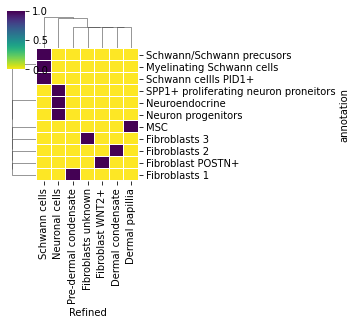

In [16]:
v1 = fsk_ad.obs.annotation
v2 = fsk_obs_df.Refined
k_diff = v1 != v2
if k_diff.sum() > 0:
    sn.clustermap(pd.crosstab(v1[k_diff], v2[k_diff])>0, cmap='viridis_r', linewidth=0.01, figsize=(5, 4.5));
else:
    print('same')

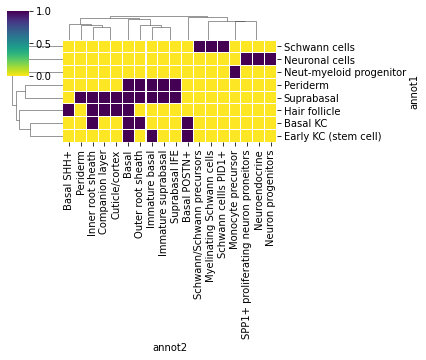

In [17]:
v1 = fsk_obs_df.annot1
v2 = fsk_obs_df.annot2
k_diff = v1 != v2
if k_diff.sum() > 0:
    sn.clustermap(pd.crosstab(v1[k_diff], v2[k_diff])>0, cmap='viridis_r', linewidth=0.01, figsize=(6, 5));
else:
    print('same')

## Update annotatio and clean up

update fibroblast annotations

In [18]:
fsk_ad.obs.annotation.cat.rename_categories({
    'MSC': 'Dermal papillia',
    'Fibroblasts 2': 'Dermal condensate',
    'Fibroblasts 1': 'Pre-dermal condensate',
    'Fibroblasts 3': 'Fibroblasts unknown',
    'Fibroblast POSTN+': 'Fibroblast WNT2+',
    'Neut-myeloid progenitor': 'Monocyte precursor',
    'Schwann/Schwann precusors': 'Schwann/Schwann precursors'
}, inplace=True)

In [19]:
set(fsk_ad.obs.annotation).symmetric_difference(set(fsk_celltype_df.Refined))

set()

In [20]:
new_obs_df = fsk_ad.obs.reset_index().merge(fsk_celltype_df.rename(columns={'Refined': 'annotation'}), how='left', left_on='annotation', right_on='annotation').set_index('index')

In [21]:
new_obs_df.head(2).T

index,AAACCTGGTCAGTGGA-1-4834STDY7002879,AAAGATGGTCGATTGT-1-4834STDY7002879
bh_doublet_pval,0.907861,0.907861
cell_caller,Both,Both
cluster_scrublet_score,0.157082,0.157082
doublet_pval,0.5,0.5
mt_prop,0.0625317,0.0308937
n_counts,5917,10261
n_genes,1776,2750
sanger_id,4834STDY7002879,4834STDY7002879
scrublet_score,0.225806,0.149606
chemistry,SC3Pv2,SC3Pv2


In [22]:
new_obs_df.columns

Index(['bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score',
       'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id',
       'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting',
       'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo',
       'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5',
       'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot',
       'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1',
       'leiden_r1_5_annot', 'celltype', 'annotation', 'annot1', 'Broad_1',
       'Broad_2', 'Broad_3', 'Broad_4', 'Broad_5'],
      dtype='object')

In [23]:
new_obs_df2 = new_obs_df[[
    'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting',
    'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval',
    'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb',
    'annotation', 'Broad_1', 'Broad_2', 'Broad_3', 'Broad_4', 'Broad_5'
]].copy()

In [24]:
v1 = new_obs_df2.annotation
v2 = fsk_obs_df.annot2
k_diff = v1 != v2
pd.crosstab(v2[k_diff], v1[k_diff])

annotation,Basal KC,Early KC (stem cell),Hair follicle,Periderm,Suprabasal
annot2,,,,,
Basal,547,8,254,2,4
Basal POSTN+,1,45,0,0,0
Basal SHH+,0,0,254,0,0
Companion layer,0,0,1,0,26
Cuticle/cortex,0,0,18,0,3
Immature basal,0,61,0,1,3
Immature suprabasal,0,0,0,6,9
Inner root sheath,1,0,4,0,13
Outer root sheath,7,0,0,1,17


In [27]:
new_obs_df2['joint_annotation'] = fsk_obs_df.annot2

In [28]:
new_obs_df2.rename(columns={
    'annotation': 'independent_annotation_refined',
    'Broad_1': 'independent_annotation_broad1',
    'Broad_2': 'independent_annotation_broad2',
    'Broad_3': 'independent_annotation_broad3',
    'Broad_4': 'independent_annotation_broad4',
    'Broad_5': 'independent_annotation_broad5',
}, inplace=True)

In [29]:
new_obs_df2.head(2).T

index,AAACCTGGTCAGTGGA-1-4834STDY7002879,AAAGATGGTCGATTGT-1-4834STDY7002879
sanger_id,4834STDY7002879,4834STDY7002879
chemistry,SC3Pv2,SC3Pv2
donor,F16,F16
gender,male,male
pcw,8,8
sorting,CD45P,CD45P
sample,F16_male_8+1PCW,F16_male_8+1PCW
chemistry_sorting,SC3Pv2_CD45P,SC3Pv2_CD45P
cell_caller,Both,Both
scrublet_score,0.225806,0.149606


In [30]:
fsk_ad.obs = new_obs_df2.copy()

In [32]:
fsk_ad.write('h5ad/fetal_skin.norm.20210401.h5ad', compression='lzf')

... storing 'independent_annotation_refined' as categorical
... storing 'independent_annotation_broad1' as categorical
... storing 'independent_annotation_broad2' as categorical
... storing 'independent_annotation_broad3' as categorical
... storing 'independent_annotation_broad4' as categorical
... storing 'independent_annotation_broad5' as categorical
... storing 'joint_annotation' as categorical
